In [1]:
!git clone https://github.com/niazwazir/WAZIR_FOREST_FIRE_PREDICTION.git

Cloning into 'WAZIR_FOREST_FIRE_PREDICTION'...
remote: Enumerating objects: 636, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 636 (delta 1), reused 0 (delta 0), pack-reused 625
Receiving objects: 100% (636/636), 31.64 MiB | 14.73 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
!ls

sample_data  WAZIR_FOREST_FIRE_PREDICTION


In [3]:
cd WAZIR_FOREST_FIRE_PREDICTION/

/content/WAZIR_FOREST_FIRE_PREDICTION


In [4]:
!ls

archive.zip				   LINK_DOWNLOAD_DATASET.txt
Dataset.csv				   WAZIR_FOREST_FIRE_PREDICTION.ipynb
FOREST_FIRE_PREDICTION_USING_IMAGES.ipynb


In [5]:
!unzip archive.zip

Archive:  archive.zip
  inflating: forest_fire/Testing/fire/abc169.jpg  
  inflating: forest_fire/Testing/fire/abc170.jpg  
  inflating: forest_fire/Testing/fire/abc171.jpg  
  inflating: forest_fire/Testing/fire/abc172.jpg  
  inflating: forest_fire/Testing/fire/abc173.jpg  
  inflating: forest_fire/Testing/fire/abc174.jpg  
  inflating: forest_fire/Testing/fire/abc175.jpg  
  inflating: forest_fire/Testing/fire/abc176.jpg  
  inflating: forest_fire/Testing/fire/abc177.jpg  
  inflating: forest_fire/Testing/fire/abc178.jpg  
  inflating: forest_fire/Testing/fire/abc179.jpg  
  inflating: forest_fire/Testing/fire/abc180.jpg  
  inflating: forest_fire/Testing/fire/abc181.jpg  
  inflating: forest_fire/Testing/fire/abc182.jpg  
  inflating: forest_fire/Testing/fire/abc183.jpg  
  inflating: forest_fire/Testing/fire/abc184.jpg  
  inflating: forest_fire/Testing/fire/abc185.jpg  
  inflating: forest_fire/Testing/fire/abc186.jpg  
  inflating: forest_fire/Testing/fire/abc187.jpg  
  inflati

In [6]:
!ls

archive.zip  FOREST_FIRE_PREDICTION_USING_IMAGES.ipynb
Dataset.csv  LINK_DOWNLOAD_DATASET.txt
forest_fire  WAZIR_FOREST_FIRE_PREDICTION.ipynb


In [7]:
cd forest_fire/

/content/WAZIR_FOREST_FIRE_PREDICTION/forest_fire


In [8]:
!ls

 Testing  'Training and Validation'


In [9]:
#ORIGINAL CODE OBTAINED FROM 
#https://www.kaggle.com/code/srijanmandal/forest-fire-detection-using-cnn
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [10]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [11]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [12]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
r = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 18s 89ms/step - loss: 0.2646 - accuracy: 0.8897 - val_loss: 0.4868 - val_accuracy: 0.8529
Epoch 2/10
58/58 [==============================] - 4s 67ms/step - loss: 0.1697 - accuracy: 0.9460 - val_loss: 0.2987 - val_accuracy: 0.8824
Epoch 3/10
58/58 [==============================] - 5s 81ms/step - loss: 0.1340 - accuracy: 0.9547 - val_loss: 0.1778 - val_accuracy: 0.9265
Epoch 4/10
58/58 [==============================] - 4s 66ms/step - loss: 0.1165 - accuracy: 0.9629 - val_loss: 0.1726 - val_accuracy: 0.9118
Epoch 5/10
58/58 [==============================] - 4s 67ms/step - loss: 0.0919 - accuracy: 0.9656 - val_loss: 0.1721 - val_accuracy: 0.9706
Epoch 6/10
58/58 [==============================] - 5s 82ms/step - loss: 0.0768 - accuracy: 0.9705 - val_loss: 0.1488 - val_accuracy: 0.9559
Epoch 7/10
58/58 [==============================] - 4s 66ms/step - loss: 0.0720 - accuracy: 0.9776 - val_loss: 0.1154 - val_accuracy: 0.9559
Epoch 8/10
5

In [16]:
#Predicting on Test Dataset
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 32ms/step


In [17]:
predictions

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [18]:
print(len(predictions))

68


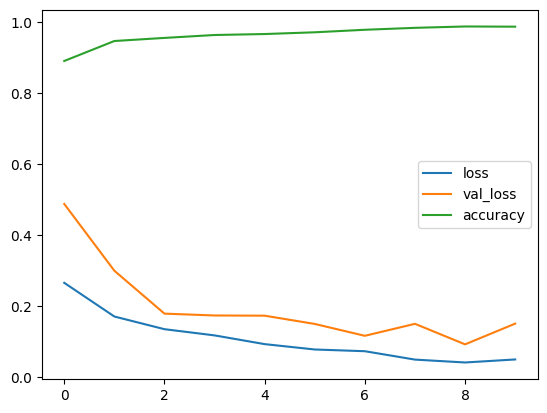

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

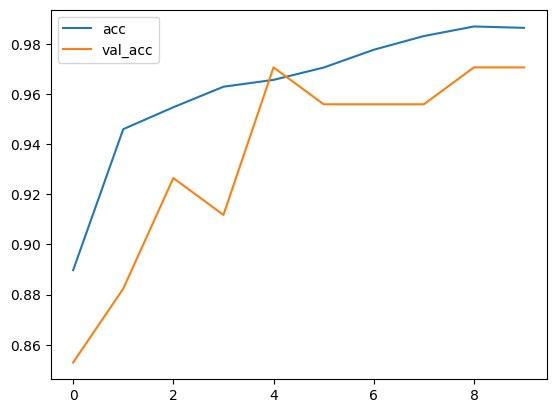

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [21]:
#Making a function to see any image from dataset with predicted label
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 240ms/step
[[0.]]


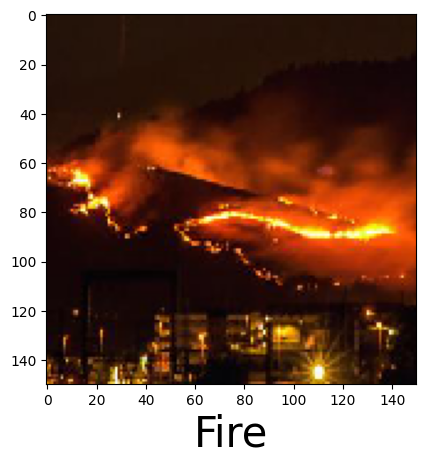

In [22]:
predictImage("Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 19ms/step
[[0.]]


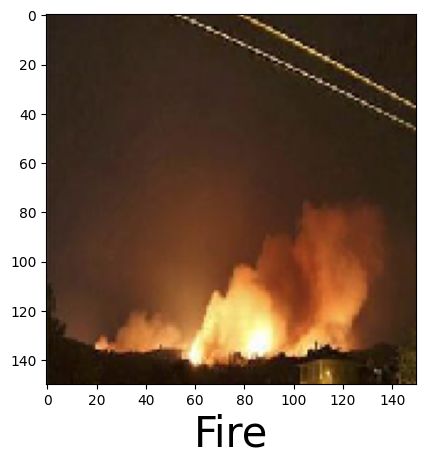

In [23]:
predictImage('Testing/fire/abc190.jpg')

1/1 [==============================] - 0s 20ms/step
[[1.]]


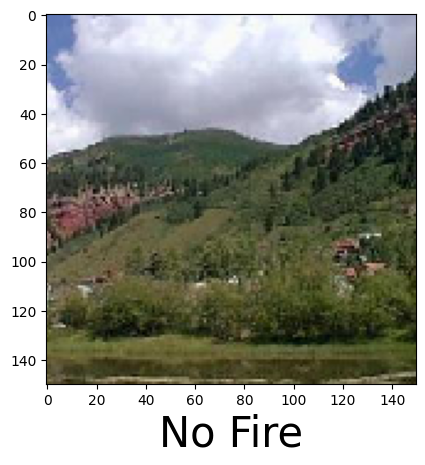

In [24]:
predictImage('Testing/nofire/abc346.jpg')

1/1 [==============================] - 0s 19ms/step
[[1.]]


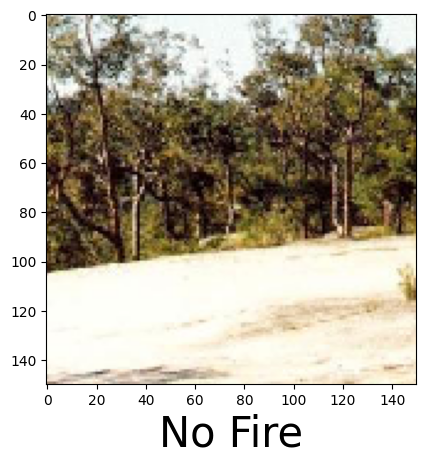

In [25]:
predictImage('Testing/nofire/abc361.jpg')

1/1 [==============================] - 0s 29ms/step
[[0.]]


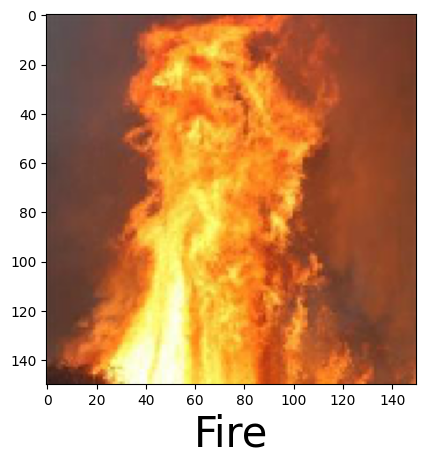

In [26]:
predictImage('Training and Validation/fire/abc011.jpg')